90.データの準備

In [3]:
!tar zxvf kftt-data-1.0.tar.gz

kftt-data-1.0/
kftt-data-1.0/data/
kftt-data-1.0/data/orig/
kftt-data-1.0/data/orig/kyoto-tune.en
kftt-data-1.0/data/orig/kyoto-dev.ja
kftt-data-1.0/data/orig/kyoto-dev.en
kftt-data-1.0/data/orig/kyoto-train.en
kftt-data-1.0/data/orig/kyoto-tune.ja
kftt-data-1.0/data/orig/kyoto-train.ja
kftt-data-1.0/data/orig/kyoto-test.ja
kftt-data-1.0/data/orig/kyoto-test.en
kftt-data-1.0/data/tok/
kftt-data-1.0/data/tok/kyoto-tune.en
kftt-data-1.0/data/tok/kyoto-dev.ja
kftt-data-1.0/data/tok/kyoto-train.cln.en
kftt-data-1.0/data/tok/kyoto-dev.en
kftt-data-1.0/data/tok/kyoto-train.en
kftt-data-1.0/data/tok/kyoto-tune.ja
kftt-data-1.0/data/tok/kyoto-train.cln.ja
kftt-data-1.0/data/tok/kyoto-train.ja
kftt-data-1.0/data/tok/kyoto-test.ja
kftt-data-1.0/data/tok/kyoto-test.en
kftt-data-1.0/README.txt


In [1]:
!head -3 kftt-data-1.0/data/tok/kyoto-train.cln.ja

日本 の 水墨 画 を 一変 さ せ た 。
諱 は 「 等楊 （ とうよう ） 」 、 もしくは 「 拙宗 （ せっしゅう ） 」 と 号 し た 。
備中 国 に 生まれ 、 京都 ・ 相国 寺 に 入 っ て から 周防 国 に 移 る 。


In [3]:
!CUDA_VISIBLE_DEVICES=0 fairseq-preprocess \
    --source-lang ja \
    --target-lang en \
    --trainpref kftt-data-1.0/data/tok/kyoto-train.cln \
    --validpref kftt-data-1.0/data/tok/kyoto-dev \
    --testpref kftt-data-1.0/data/tok/kyoto-test \
    --tokenizer space \
    --destdir data-bin

2023-07-04 15:42:48 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2023-07-04 15:42:49 | INFO | fairseq_cli.preprocess | Namespace(no_progress_bar=False, log_interval=100, log_format=None, log_file=None, aim_repo=None, aim_run_hash=None, tensorboard_logdir=None, wandb_project=None, azureml_logging=False, seed=1, cpu=False, tpu=False, bf16=False, memory_efficient_bf16=False, fp16=False, memory_efficient_fp16=False, fp16_no_flatten_grads=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, on_cpu_convert_precision=False, min_loss_scale=0.0001, threshold_loss_scale=None, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, user_dir=None, empty_cache_freq=0, all_gather_list_size=16384, model_parallel_size=1, quantization_config_path=None, profile=False, reset_logging=False, suppress_crashes=False, use_plasma_view=False, plasma_path='/tmp/plasma', criterion='cross_entropy', tokenizer='space', bpe=N

91.機械翻訳モデルの訓練

In [1]:
!CUDA_VISIBLE_DEVICES=0 fairseq-train data-bin \
    --arch transformer \
    --optimizer adam --adam-betas '(0.9,0.98)' \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.2 --weight-decay 1e-4 --clip-norm 1.0 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 4000 --update-freq 1 \
    --save-interval-updates 500 --validate-interval-updates 500 \
    --keep-interval-updates 500 --no-epoch-checkpoints \
    --fp16 \
    --max-epoch 10

2023-07-04 15:53:31 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2023-07-04 15:53:34 | INFO | fairseq_cli.train | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': True, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': Fals

92.機械翻訳モデルの適用

In [2]:
!CUDA_VISIBLE_DEVICES=0 fairseq-generate data-bin --path checkpoints/checkpoint_best.pt --batch-size 128 --beam 5 > result.txt
!head -20 result.txt

2023-07-04 17:13:12 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2023-07-04 17:13:14 | INFO | fairseq_cli.generate | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': 

In [3]:
!grep "^H-" result.txt | sort -V | cut -f3 > result.en.txt
!head result.en.txt

Entrance hall
Dogen ( dates of birth and death unknown ) was a Zen monk in the early Kamakura period .
He was the founder of the Soto sect .
His first name was also written in the same way .
It is said that he was a devout believer .
His posthumous Buddhist name was Chisho Daishi .
It is commonly known as the Zen sect .
In Japan , it is said that he or she was a young man of refined taste .
It is also said that he made a replica of bamboo leaves in his hometown .
There is a view that he was a rakuin of the Minister of the Left , MINAMOTO no Yoshimitsu , and others , but the truth is unknown .


93.BLEUスコアの計測

In [4]:
!fairseq-score --sys result.en.txt --ref kftt-data-1.0/data/tok/kyoto-test.en

2023-07-04 17:13:57 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
Namespace(sys='result.en.txt', ref='kftt-data-1.0/data/tok/kyoto-test.en', order=4, ignore_case=False, sacrebleu=False, sentence_bleu=False)
BLEU4 = 6.01, 35.6/9.9/4.1/2.0 (BP=0.820, ratio=0.834, syslen=22300, reflen=26734)


94.ビーム探索

In [4]:
%%bash
for i in 1 2 3 4 5
do
CUDA_VISIBLE_DEVICES=0 fairseq-generate data-bin --path checkpoints/checkpoint_best.pt --batch-size 128 --beam $i > result.$i.txt
grep "^H-" result.$i.txt | sort -V | cut -f3 > result.$i.en.txt
fairseq-score --sys result.$i.en.txt --ref kftt-data-1.0/data/tok/kyoto-test.en >> BLEU.txt
done

2023-07-05 13:32:33 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2023-07-05 13:32:35 | INFO | fairseq_cli.generate | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': 

[5.39, 5.65, 5.83, 5.93, 6.01]


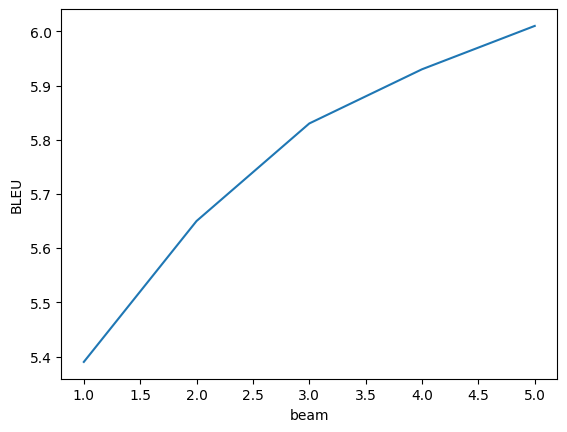

In [10]:
import matplotlib.pyplot as plt
import re

fname = 'BLEU.txt'
def read_score(fname):
    score = []
    with open(fname, 'r') as f:
        for line in f:
            if line.startswith('BLEU4'):
                match = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', line)
                score.append(float(match.group(0)))
    print(score)
    return score

x = [1, 2, 3, 4, 5]
y = read_score(fname)
plt.plot(x, y)
plt.xlabel("beam")
plt.ylabel("BLEU")
plt.show()

95.サブワード化

In [1]:
import sentencepiece as spm

spm.SentencePieceTrainer.Train(
    '--input=./kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=./spm-model/spm.ja --vocab_size=32000 --character_coverage=0.9995 --model_type=unigram'
)
spm.SentencePieceTrainer.Train(
    '--input=./kftt-data-1.0/data/orig/kyoto-train.en --model_prefix=./spm-model/spm.en --vocab_size=32000 --character_coverage=1.0 --model_type=unigram'
)

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=./kftt-data-1.0/data/orig/kyoto-train.ja --model_prefix=./spm-model/spm.ja --vocab_size=32000 --character_coverage=0.9995 --model_type=unigram
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: ./kftt-data-1.0/data/orig/kyoto-train.ja
  input_format: 
  model_prefix: ./spm-model/spm.ja
  model_type: UNIGRAM
  vocab_size: 32000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  ha

In [2]:
import sentencepiece as spm
sp_ja = spm.SentencePieceProcessor(model_file='./spm-model/spm.ja.model')
sp_en = spm.SentencePieceProcessor(model_file='./spm-model/spm.en.model')

def make_corpus(fname_unigram, fname_raw, model):
    with open(fname_unigram, 'w') as f_uni, open(fname_raw, 'r') as f_raw:
        for line in f_raw:
            f_uni.write(' '.join(model.encode(line, out_type=str)))
            f_uni.write('\n')
        
make_corpus('./unigram-corpus/train.ja', './kftt-data-1.0/data/orig/kyoto-train.ja', sp_ja)
make_corpus('./unigram-corpus/dev.ja', './kftt-data-1.0/data/orig/kyoto-dev.ja', sp_ja)
make_corpus('./unigram-corpus/test.ja', './kftt-data-1.0/data/orig/kyoto-test.ja', sp_ja)
make_corpus('./unigram-corpus/train.en', './kftt-data-1.0/data/orig/kyoto-train.en', sp_en)
make_corpus('./unigram-corpus/dev.en', './kftt-data-1.0/data/orig/kyoto-dev.en', sp_en)
make_corpus('./unigram-corpus/test.en', './kftt-data-1.0/data/orig/kyoto-test.en', sp_en)

In [14]:
!CUDA_VISIBLE_DEVICES=0 fairseq-preprocess \
    --source-lang ja \
    --target-lang en \
    --trainpref ./unigram-corpus/train \
    --validpref ./unigram-corpus/dev \
    --testpref ./unigram-corpus/test \
    --destdir data-spm-bin

2023-07-10 16:32:05 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2023-07-10 16:32:05 | INFO | fairseq_cli.preprocess | Namespace(no_progress_bar=False, log_interval=100, log_format=None, log_file=None, aim_repo=None, aim_run_hash=None, tensorboard_logdir=None, wandb_project=None, azureml_logging=False, seed=1, cpu=False, tpu=False, bf16=False, memory_efficient_bf16=False, fp16=False, memory_efficient_fp16=False, fp16_no_flatten_grads=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, on_cpu_convert_precision=False, min_loss_scale=0.0001, threshold_loss_scale=None, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, user_dir=None, empty_cache_freq=0, all_gather_list_size=16384, model_parallel_size=1, quantization_config_path=None, profile=False, reset_logging=False, suppress_crashes=False, use_plasma_view=False, plasma_path='/tmp/plasma', criterion='cross_entropy', tokenizer=None, bpe=None

In [35]:
!CUDA_VISIBLE_DEVICES=0,1 fairseq-train data-spm-bin \
    --arch transformer \
    --optimizer adam --adam-betas '(0.9,0.98)' \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.2 --weight-decay 1e-4 --clip-norm 1.0 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 4000 --update-freq 1 \
    --save-dir checkpoints-spm \
    --save-interval-updates 100 --validate-interval-updates 100 \
    --keep-interval-updates 10 --no-epoch-checkpoints \
    --fp16 \
    --tensorboard-logdir tensorboard \
    --max-epoch 10

2023-07-10 17:33:31 | INFO | fairseq.distributed.utils | distributed init (rank 1): tcp://localhost:18116
2023-07-10 17:33:31 | INFO | fairseq.distributed.utils | distributed init (rank 0): tcp://localhost:18116
2023-07-10 17:33:31 | INFO | torch.distributed.distributed_c10d | Added key: store_based_barrier_key:1 to store for rank: 0
2023-07-10 17:33:31 | INFO | torch.distributed.distributed_c10d | Added key: store_based_barrier_key:1 to store for rank: 1
2023-07-10 17:33:31 | INFO | torch.distributed.distributed_c10d | Rank 1: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.
2023-07-10 17:33:31 | INFO | fairseq.distributed.utils | initialized host opus3 as rank 1
2023-07-10 17:33:31 | INFO | torch.distributed.distributed_c10d | Rank 0: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.
2023-07-10 17:33:31 | INFO | fairseq.distributed.utils | initialized host opus3 as rank 0
2023-07-10 17:33:33 | INFO | fairseq_cli.train | {'_name

In [36]:
!CUDA_VISIBLE_DEVICES=0 fairseq-generate data-spm-bin --path checkpoints-spm/checkpoint_best.pt --batch-size 128 --beam 5 > ./spm-results/result.txt --remove-bpe=sentencepiece
!head -20 ./spm-results/result.txt

2023-07-10 18:43:35 | INFO | fairseq_cli.generate | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_name'

In [37]:
!grep "^H-" ./spm-results/result.txt | sort -V | cut -f3 > ./spm-results/result.en.txt
!head ./spm-results/result.en.txt

Candlebria
Dogen was a Zen priest in the early Kamakura period.
He was the founder of the Soto sect.
In his later years, he was also called Gengen.
He was called the founder of the sect.
His posthumous name was Togoku-bo (the eastern part of Japan, particularly Kanto region), and his posthumous Buddhist name was Jiku Daishi.
Generally, he is called Dogen Zenji.
It is said that they spread the custom of washing teeth and eating utensils at the time of meal.
There is a theory that it was first brought back to the place where the first plant was brought back to Japan.
There are many theories regarding the birth of Dogen, but there are various theories regarding the reason why he was born to Michichika TSUCHIMIKADO (or Michichika KOGA, who was the direct descendant of MINAMOTO no Michichika), who was the Naidaijin (minister of the center).


In [38]:
!fairseq-score --sys ./spm-results/result.en.txt --ref kftt-data-1.0/data/orig/kyoto-test.en

Namespace(sys='./spm-results/result.en.txt', ref='kftt-data-1.0/data/orig/kyoto-test.en', order=4, ignore_case=False, sacrebleu=False, sentence_bleu=False)
BLEU4 = 10.31, 33.1/13.9/6.8/3.6 (BP=1.000, ratio=1.101, syslen=24288, reflen=22063)


In [39]:
%%bash
for i in 1 2 3 4 5
do
CUDA_VISIBLE_DEVICES=0 fairseq-generate data-spm-bin --path checkpoints-spm/checkpoint_best.pt --batch-size 128 --beam $i > ./spm-results/result.$i.txt --remove-bpe=sentencepiece
grep "^H-" ./spm-results/result.$i.txt | sort -V | cut -f3 > ./spm-results/result.$i.en.txt
fairseq-score --sys ./spm-results/result.$i.en.txt --ref kftt-data-1.0/data/orig/kyoto-test.en >> ./spm-results/BLEU.txt
done

2023-07-10 18:44:14 | INFO | fairseq_cli.generate | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_name'

[9.3, 9.9, 10.48, 10.37, 10.31]


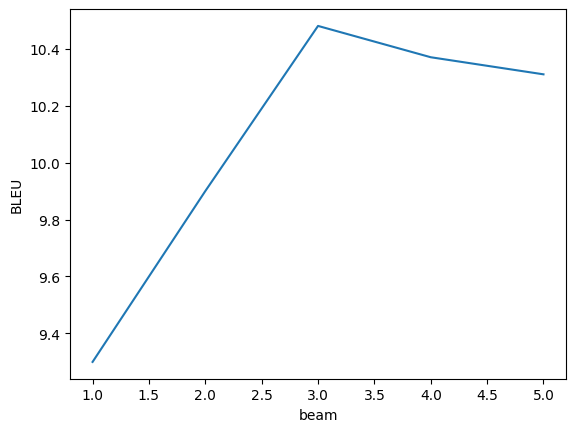

In [40]:
import matplotlib.pyplot as plt
import re

fname = './spm-results/BLEU.txt'
def read_score(fname):
    score = []
    with open(fname, 'r') as f:
        for line in f:
            if line.startswith('BLEU4'):
                match = re.search(r'(?<=BLEU4 = )\d*\.\d*(?=,)', line)
                score.append(float(match.group(0)))
    print(score)
    return score

x = [1, 2, 3, 4, 5]
y = read_score(fname)
plt.plot(x, y)
plt.xlabel("beam")
plt.ylabel("BLEU")
plt.show()

In [42]:
!tensorboard --logdir tensorboard --host=localhost --port=8000

TensorFlow installation not found - running with reduced feature set.
/home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.29' not found (required by /home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server)
/home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server)
/home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.28' not found (required by /home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server)
/home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorb

97.ハイパー・パラメータの調整

In [46]:
!CUDA_VISIBLE_DEVICES=0,1 fairseq-train data-spm-bin \
    --arch transformer --share-decoder-input-output-embed \
    --optimizer adam --adam-betas '(0.9,0.98)' \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 1e-4 --clip-norm 1.0 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 --update-freq 1 \
    --save-dir checkpoints-97 \
    --save-interval-updates 100 --validate-interval-updates 100 \
    --keep-interval-updates 10 --no-epoch-checkpoints \
    --fp16 \
    --tensorboard-logdir tensorboard-97 \
    --max-epoch 10

2023-07-10 18:55:16 | INFO | fairseq.distributed.utils | distributed init (rank 1): tcp://localhost:12671
2023-07-10 18:55:16 | INFO | fairseq.distributed.utils | distributed init (rank 0): tcp://localhost:12671
2023-07-10 18:55:17 | INFO | torch.distributed.distributed_c10d | Added key: store_based_barrier_key:1 to store for rank: 1
2023-07-10 18:55:17 | INFO | torch.distributed.distributed_c10d | Added key: store_based_barrier_key:1 to store for rank: 0
2023-07-10 18:55:17 | INFO | torch.distributed.distributed_c10d | Rank 0: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.
2023-07-10 18:55:17 | INFO | fairseq.distributed.utils | initialized host opus3 as rank 0
2023-07-10 18:55:17 | INFO | torch.distributed.distributed_c10d | Rank 1: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.
2023-07-10 18:55:17 | INFO | fairseq.distributed.utils | initialized host opus3 as rank 1
2023-07-10 18:55:19 | INFO | fairseq_cli.train | {'_name

In [50]:
!CUDA_VISIBLE_DEVICES=0 fairseq-generate data-spm-bin --path checkpoints-97/checkpoint_best.pt --batch-size 128 --beam 5 > ./97-results/result.txt --remove-bpe=sentencepiece
!head -20 ./97-results/result.txt

2023-07-10 20:04:51 | INFO | fairseq_cli.generate | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_name'

In [51]:
!grep "^H-" ./97-results/result.txt | sort -V | cut -f3 > ./97-results/result.en.txt
!head ./97-results/result.en.txt

Ilp: Bergent
Dogen was a Zen priest in the early Kamakura period.
He was the founder of the Soto sect.
In his later years, he also used the different name, Kigen.
In the same sect, he was called Koso.
His shi (posthumous name) was Busshoden Togokushi (Master of the Eastern Capital Offices) and Shoyo Daishi (priest).
Generally, he is called Dogen Zenji.
It is said that he spread the manner and custom of cleaning teeth in Japan.
There is a theory that at first he brought back a green grass.
There are many theories about Dogen's birth, but there are several theories on the origin of Dogen's birth; one is that he was born in the direct line of Michichika TSUCHIMIKADO (MINAMOTO no Michichika or Michichika KOGA), Naidaijin (Minister of the Interior).


In [52]:
!fairseq-score --sys ./97-results/result.en.txt --ref kftt-data-1.0/data/orig/kyoto-test.en

Namespace(sys='./97-results/result.en.txt', ref='kftt-data-1.0/data/orig/kyoto-test.en', order=4, ignore_case=False, sacrebleu=False, sentence_bleu=False)
BLEU4 = 15.57, 43.6/20.8/11.1/6.3 (BP=0.980, ratio=0.981, syslen=21636, reflen=22063)


98.ドメイン適応

In [53]:
!wget http://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/release/3.0/pretrained_models/ja-en/base.tar.gz

--2023-07-10 20:08:32--  http://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/release/3.0/pretrained_models/ja-en/base.tar.gz
www.kecl.ntt.co.jp (www.kecl.ntt.co.jp) をDNSに問いあわせています... 163.137.218.58
www.kecl.ntt.co.jp (www.kecl.ntt.co.jp)|163.137.218.58|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 943815658 (900M) [application/x-gzip]
`base.tar.gz' に保存中

base.tar.gz         100%[===================>] 900.09M  5.07MB/s    時間 3m 24s  

2023-07-10 20:11:56 (4.41 MB/s) - `base.tar.gz' へ保存完了 [943815658/943815658]



In [54]:
!tar zxvf base.tar.gz
!rm -r base.tar.gz

base/
base/LICENSE
base/dict.en.txt
base/base.pretrain.pt
base/dict.ja.txt


In [7]:
!wget https://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/release/3.0/spm_models/en-ja_spm.tar.gz
!tar zxvf en-ja_spm.tar.gz
!rm -r en-ja_spm.tar.gz

--2023-07-12 12:52:01--  https://www.kecl.ntt.co.jp/icl/lirg/jparacrawl/release/3.0/spm_models/en-ja_spm.tar.gz
www.kecl.ntt.co.jp (www.kecl.ntt.co.jp) をDNSに問いあわせています... 163.137.218.58
www.kecl.ntt.co.jp (www.kecl.ntt.co.jp)|163.137.218.58|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 1138921 (1.1M) [application/x-gzip]
`en-ja_spm.tar.gz' に保存中

en-ja_spm.tar.gz    100%[===================>]   1.09M  4.01MB/s    時間 0.3s    

2023-07-12 12:52:01 (4.01 MB/s) - `en-ja_spm.tar.gz' へ保存完了 [1138921/1138921]

enja_spm_models/
enja_spm_models/spm.en.nopretok.vocab
enja_spm_models/spm.en.nopretok.model
enja_spm_models/spm.ja.nopretok.model
enja_spm_models/spm.ja.nopretok.vocab


In [11]:
!mkdir ./pretrain-corpus

In [12]:
import sentencepiece as spm
sp_pre_ja = spm.SentencePieceProcessor(model_file='./enja_spm_models/spm.ja.nopretok.model')
sp_pre_en = spm.SentencePieceProcessor(model_file='./enja_spm_models/spm.en.nopretok.model')

def make_corpus(fname_unigram, fname_raw, model):
    with open(fname_unigram, 'w') as f_uni, open(fname_raw, 'r') as f_raw:
        for line in f_raw:
            f_uni.write(' '.join(model.encode(line, out_type=str)))
            f_uni.write('\n')

make_corpus('./pretrain-corpus/train.ja', './kftt-data-1.0/data/orig/kyoto-train.ja', sp_pre_ja)
make_corpus('./pretrain-corpus/dev.ja', './kftt-data-1.0/data/orig/kyoto-dev.ja', sp_pre_ja)
make_corpus('./pretrain-corpus/test.ja', './kftt-data-1.0/data/orig/kyoto-test.ja', sp_pre_ja)
make_corpus('./pretrain-corpus/train.en', './kftt-data-1.0/data/orig/kyoto-train.en', sp_pre_en)
make_corpus('./pretrain-corpus/dev.en', './kftt-data-1.0/data/orig/kyoto-dev.en', sp_pre_en)
make_corpus('./pretrain-corpus/test.en', './kftt-data-1.0/data/orig/kyoto-test.en', sp_pre_en)

In [13]:
!CUDA_VISIBLE_DEVICES=0 fairseq-preprocess \
    --source-lang ja \
    --target-lang en \
    --trainpref ./pretrain-corpus/train \
    --validpref ./pretrain-corpus/dev \
    --testpref ./pretrain-corpus/test \
    --srcdict ./base/dict.ja.txt \
    --tgtdict ./base/dict.en.txt \
    --destdir pretrain-bin

2023-07-12 13:07:09 | INFO | fairseq_cli.preprocess | Namespace(no_progress_bar=False, log_interval=100, log_format=None, log_file=None, aim_repo=None, aim_run_hash=None, tensorboard_logdir=None, wandb_project=None, azureml_logging=False, seed=1, cpu=False, tpu=False, bf16=False, memory_efficient_bf16=False, fp16=False, memory_efficient_fp16=False, fp16_no_flatten_grads=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, on_cpu_convert_precision=False, min_loss_scale=0.0001, threshold_loss_scale=None, amp=False, amp_batch_retries=2, amp_init_scale=128, amp_scale_window=None, user_dir=None, empty_cache_freq=0, all_gather_list_size=16384, model_parallel_size=1, quantization_config_path=None, profile=False, reset_logging=False, suppress_crashes=False, use_plasma_view=False, plasma_path='/tmp/plasma', criterion='cross_entropy', tokenizer=None, bpe=None, optimizer=None, lr_scheduler='fixed', scoring='bleu', task='translation', source_lang='ja', target_lang='en', tr

In [1]:
!CUDA_VISIBLE_DEVICES=0,1 fairseq-train pretrain-bin --restore-file ./base/base.pretrain.pt \
    --arch transformer --share-decoder-input-output-embed \
    --reset-optimizer --reset-dataloader --reset-meters \
    --optimizer adam --adam-betas '(0.9,0.98)' \
    --lr 1e-3 --lr-scheduler inverse_sqrt --warmup-updates 2000 \
    --dropout 0.1 --weight-decay 1e-4 --clip-norm 1.0 \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 \
    --max-tokens 8000 --update-freq 1 \
    --save-dir checkpoints-98 \
    --save-interval-updates 100 --validate-interval-updates 100 \
    --keep-interval-updates 10 --no-epoch-checkpoints \
    --fp16 \
    --tensorboard-logdir tensorboard-98 \
    --max-epoch 3

2023-07-13 15:41:10 | INFO | fairseq.distributed.utils | distributed init (rank 1): tcp://localhost:19495
2023-07-13 15:41:10 | INFO | fairseq.distributed.utils | distributed init (rank 0): tcp://localhost:19495
2023-07-13 15:41:10 | INFO | torch.distributed.distributed_c10d | Added key: store_based_barrier_key:1 to store for rank: 0
2023-07-13 15:41:10 | INFO | torch.distributed.distributed_c10d | Added key: store_based_barrier_key:1 to store for rank: 1
2023-07-13 15:41:10 | INFO | torch.distributed.distributed_c10d | Rank 0: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.
2023-07-13 15:41:10 | INFO | torch.distributed.distributed_c10d | Rank 1: Completed store-based barrier for key:store_based_barrier_key:1 with 2 nodes.
2023-07-13 15:41:10 | INFO | fairseq.distributed.utils | initialized host opus1 as rank 0
2023-07-13 15:41:10 | INFO | fairseq.distributed.utils | initialized host opus1 as rank 1
2023-07-13 15:41:12 | INFO | fairseq_cli.train | {'_name

In [2]:
!CUDA_VISIBLE_DEVICES=0 fairseq-generate pretrain-bin --path checkpoints-98/checkpoint_best.pt --batch-size 128 --beam 5 > ./98-results/result.txt --remove-bpe=sentencepiece
!head -20 ./98-results/result.txt

2023-07-13 15:53:50 | INFO | fairseq_cli.generate | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 100, 'log_format': None, 'log_file': None, 'aim_repo': None, 'aim_run_hash': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'on_cpu_convert_precision': False, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'amp': False, 'amp_batch_retries': 2, 'amp_init_scale': 128, 'amp_scale_window': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False, 'use_plasma_view': False, 'plasma_path': '/tmp/plasma'}, 'common_eval': {'_name'

In [3]:
!grep "^H-" ./98-results/result.txt | sort -V | cut -f3 > ./98-results/result.en.txt
!head ./98-results/result.en.txt

Info box buddhist
Dogen was a Zen priest in the early Kamakura period.
He was the founder of the Soto sect.
In his later years, he also used the pseudonym of Kigen.
According to the Soji of the same sect, he was revered as the founder of the sect.
His shi (posthumous name) was Busshoden Togokushi (Buddhist priest) and Joyo Daishi (a priest).
He is generally called Dogen Zenji.
It is said that he spread to Japan how to clean his teeth by polishing his teeth, how to do with meals, and how to clean his teeth.
There is a theory that he brought back Mosotik (Mosochiku) at the beginning.
There are many unclear points about the birth of Dogen, but there are various theories that he was born in the direct line of Michichika TSUCHIMIKADO (MINAMOTO no Michichika or Michichika KOGA), who was Naidaijin (Minister of the Center).


In [4]:
!fairseq-score --sys ./98-results/result.en.txt --ref kftt-data-1.0/data/orig/kyoto-test.en

Namespace(sys='./98-results/result.en.txt', ref='kftt-data-1.0/data/orig/kyoto-test.en', order=4, ignore_case=False, sacrebleu=False, sentence_bleu=False)
BLEU4 = 16.62, 44.5/21.9/11.8/6.7 (BP=1.000, ratio=1.008, syslen=22238, reflen=22063)


In [5]:
!tensorboard --logdir tensorboard-98 --host=localhost

TensorFlow installation not found - running with reduced feature set.
/home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.29' not found (required by /home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server)
/home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server)
/home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.28' not found (required by /home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorboard_data_server/bin/server)
/home/sugihara/anaconda3/envs/NLP100_2/lib/python3.10/site-packages/tensorb